In [1]:
import numpy as np
heatmap = np.load("/home/nvidia/Work/sp-sold2-vins_ws/src/sp-sold2-vins/notebook/np/heatmap.npy")
print(heatmap[0, 0, 0:5])

[0.06088644 0.04262565 0.02347683 0.0177828  0.01984416]


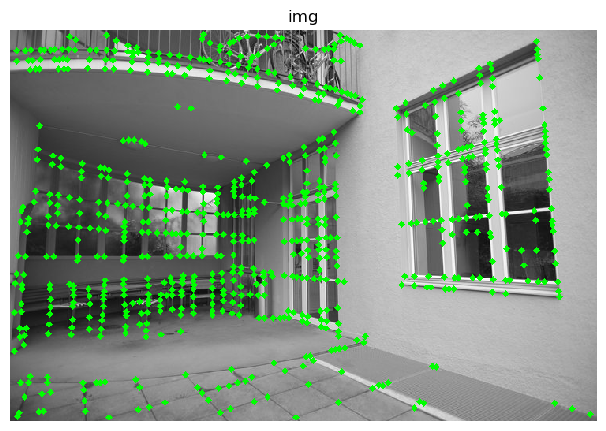

In [3]:
import numpy as np
from vision_utils import plot_images, plot_junctions, plot_line_segments

pts = np.load("/home/nvidia/Work/sp-sold2-vins_ws/src/sp-sold2-vins/notebook/tensor/pts_te.npy")
img = np.load("/home/nvidia/Work/sp-sold2-vins_ws/src/sp-sold2-vins/notebook/tensor/img_te.npy")
img_pts = plot_junctions(img, np.flip(pts[0:2]), junc_size=2)
plot_images([img_pts], ["img"])

(1792, 2) (51968, 2) (14886, 2)


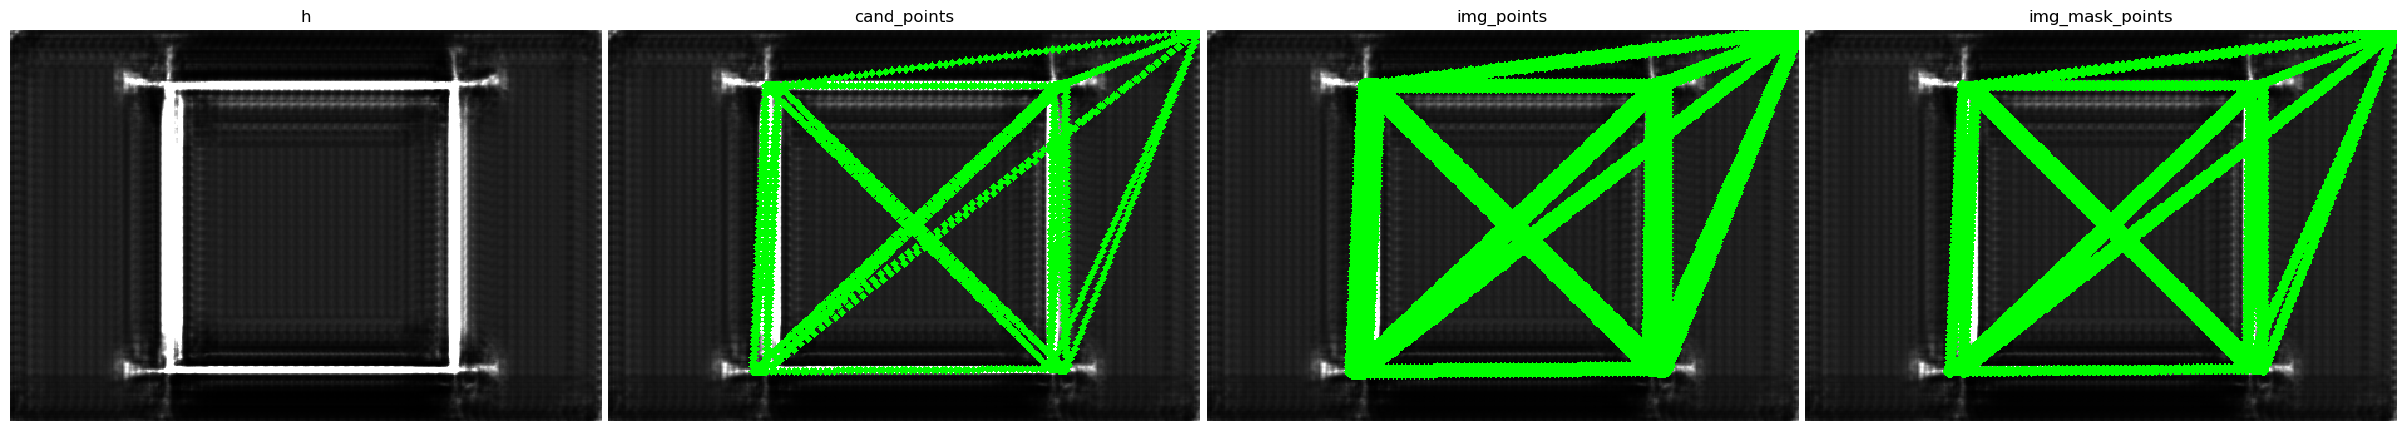

In [4]:
import numpy as np
from vision_utils import plot_images, plot_junctions, plot_line_segments
heatmap = np.load("/home/nvidia/Work/sp-sold2-vins_ws/src/sp-sold2-vins/notebook/tensor/heatmap0.npy")
# junctions1 = np.load("/home/nvidia/Work/sp-sold2-vins_ws/src/sp-sold2-vins/notebook/tensor/junctions1.npy")
# img = np.load("/home/nvidia/Work/sp-sold2-vins_ws/src/sp-sold2-vins/notebook/tensor/img.npy")
# plot_images([img], ["Img"])
# print(junctions1.shape)
cand_points_round = np.load("/home/nvidia/Work/sp-sold2-vins_ws/src/sp-sold2-vins/notebook/tensor/cand_points_round0.npy")
points = np.load("/home/nvidia/Work/sp-sold2-vins_ws/src/sp-sold2-vins/notebook/tensor/points0.npy")
patch_dist_mask = np.load("/home/nvidia/Work/sp-sold2-vins_ws/src/sp-sold2-vins/notebook/tensor/patch_dist_mask0.npy")
cand_points_round = cand_points_round.reshape(-1,2)
points = points.reshape(-1,2)
mask = patch_dist_mask.flatten()
mask_points = points[mask]
img_cand_points = plot_junctions(heatmap, cand_points_round, junc_size=1)
img_points = plot_junctions(heatmap, points, junc_size=1)
img_mask_points = plot_junctions(heatmap, mask_points, junc_size=1)

print(cand_points_round.shape, points.shape, mask_points.shape)
plot_images([heatmap, img_cand_points, img_points, img_mask_points], ["h", "cand_points", "img_points", "img_mask_points"])


[[ 68.67354   55.79859  129.942135 255.      ]
 [ 47.31678  106.73535  141.972015 255.      ]
 [ 42.87213  117.29694  142.31091  255.      ]
 ...
 [ 68.33184   57.004995 130.56204  255.      ]
 [ 69.001725  54.587595 129.29826  255.      ]
 [ 72.13542   34.6596   115.623885 255.      ]]


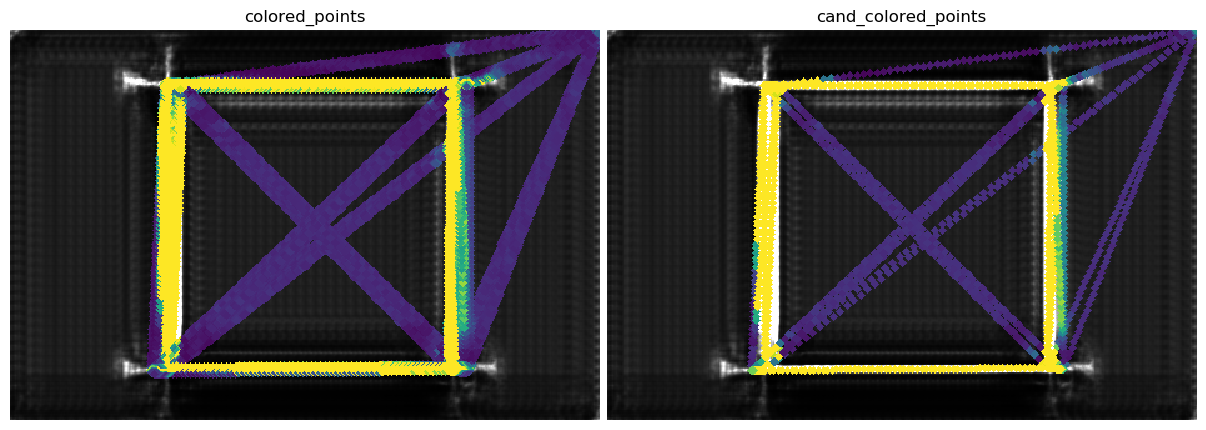

In [5]:
import matplotlib.pyplot as plt
sampled_feat = np.load("/home/nvidia/Work/sp-sold2-vins_ws/src/sp-sold2-vins/notebook/tensor/sampled_feat0.npy")
sampled_feat = sampled_feat.flatten()
sampled_feat_lmax = np.load("/home/nvidia/Work/sp-sold2-vins_ws/src/sp-sold2-vins/notebook/tensor/sampled_feat_lmax0.npy")
sampled_feat_lmax = sampled_feat_lmax.flatten()
colors = plt.cm.viridis(sampled_feat / max(sampled_feat)) * 255 # 这里使用了viridis色彩映射，你可以根据需要选择其他映射
colors_lmax = plt.cm.viridis(sampled_feat_lmax / max(sampled_feat_lmax)) * 255 # 这里使用了viridis色彩映射，你可以根据需要选择其他映射

print(colors)
img_colored_points = plot_junctions(heatmap, points, junc_size=1, color=colors[...,0:3])
cand_colored_points = plot_junctions(heatmap, cand_points_round, junc_size=1, color=colors_lmax[...,0:3])
plot_images([img_colored_points, cand_colored_points], ["colored_points", "cand_colored_points"])

In [ ]:
img = np.load("/home/nvidia/Work/sp-sold2-vins_ws/src/sp-sold2-vins/notebook/tensor/img0.npy")
junctions = np.load("/home/nvidia/Work/sp-sold2-vins_ws/src/sp-sold2-vins/notebook/tensor/junctions0.npy")
line_map = np.load("/home/nvidia/Work/sp-sold2-vins_ws/src/sp-sold2-vins/notebook/tensor/line_map0.npy")
img_junctions = plot_junctions(img, junctions, junc_size=1, color=(0,0,255))
plot_images([img_junctions], ["img_junctions"])
# import torch
# device = "cuda"
# output_segments = torch.zeros([0, 2, 2]).to(device)
# for idx in range(junctions.shape[0]):
#     # if no connectivity, just skip it
#     if line_map[idx, :].sum() == 0:
#         continue
#     # Record the line segment
#     else:
#         for idx2 in torch.where(line_map[idx, :] == 1)[0]:
#             p1 = junctions[idx, :]  # HW format
#             p2 = junctions[idx2, :]
#             single_seg = torch.cat([p1[None, ...], p2[None, ...]],
#                                         axis=0)
#             output_segments = torch.cat(
#                 (output_segments, single_seg[None, ...]), axis=0)
            
#             # Update line_map
#             line_map[idx, idx2] = 0
#             line_map[idx2, idx] = 0
# output_segments = output_segments.cpu().numpy()
print(np.sum(line_map==1))
img_lines = plot_line_segments(img, junctions, line_map)
plot_images([img_lines], ["lines"])


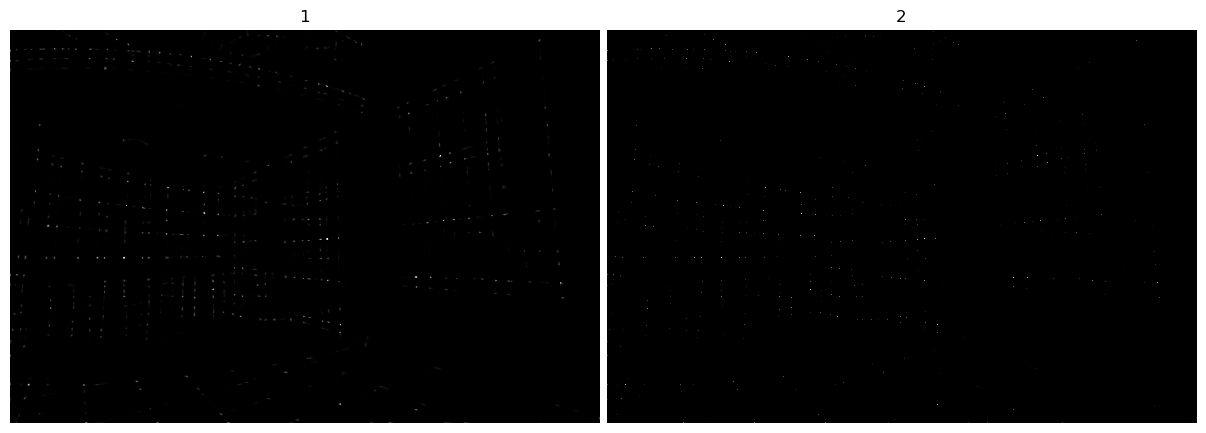

In [2]:
import numpy as np
from vision_utils import plot_images, plot_junctions, plot_line_segments

heatmap1 = np.load("/home/nvidia/Work/sp-sold2-vins_ws/src/sp-sold2-vins/notebook/np/heatmap1.npy")
heatmap2 = np.load("/home/nvidia/Work/sp-sold2-vins_ws/src/sp-sold2-vins/notebook/np/heatmap2.npy")\

plot_images([heatmap1[0]*255, heatmap2[0]*255], ["1", "2"])

In [ ]:
heatmap2 = np.load("/home/nvidia/Work/sp-sold2-vins_ws/src/sp-sold2-vins/notebook/tensor/heatmap2.npy")
junctions2 = np.load("/home/nvidia/Work/sp-sold2-vins_ws/src/sp-sold2-vins/notebook/tensor/junctions2.npy")
img2 = np.load("/home/nvidia/Work/sp-sold2-vins_ws/src/sp-sold2-vins/notebook/tensor/img.npy")
# plot_images([img], ["Img"])
print(junctions1.shape, junctions2.shape)
img_junctions2 = plot_junctions(img2, junctions2.squeeze(), junc_size=1)
plot_images([img_junctions1, img_junctions2], ["IMG1", "IMG2"])

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
 
# 概率霍夫变换
# src = cv.imread("E:\\Hough.png")
# img = src.copy()
# gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
count = np.sum(heatmap2*255>100)
print(count, heatmap2.shape)
print(count/(heatmap2.shape[0]*heatmap2.shape[1]))
img = heatmap2.copy()*255
img = img.astype(np.uint8)
# print(img.shape)
# print(img)
ksize=5#模板半径
#处理模糊图像
#进行模糊处理高斯滤波
gauss_img=cv.GaussianBlur(img, (ksize, ksize),1)

# dst_img = cv.Canny(img, 50, 50)

lines = cv.HoughLines(gauss_img, 3, np.pi / 180, 100)
print(lines.shape)
# print(lines)
lines = lines.squeeze()
# for x1, y1, x2, y2 in lines:
#     cv.line(img2, (x1, y1), (x2, y2), (0, 255, 0), 2)
img2 = np.zeros((480,752,3))
img2[:,:,0] = img
img2[:,:,1] = img
img2[:,:,2] = img
for line in lines:
        rho, theta = line
        a = np.cos(theta)
        b = np.sin(theta)

        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * a)
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * a)
        # cv.line(img2, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv.circle(img,(y1,x1),1,(0,0,255),-1)
        cv.circle(img,(y2,x2),1,(0,0,255),-1)


print(lines)
# # cv.imshow("HoughLinesP", img)
# # cv.waitKey(0)
plot_images([gauss_img, img, img2], ["gauss_img", "img", "lines"])